In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# -- Librerías de Keras

# import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras import backend as K


# Librería de la base de datos de imágenes MNIST
from keras.datasets import mnist

# Librería "display" para visualizacion de las imágenes pixeladas
from IPython.display import display
import time


2022-08-29 16:57:31.908546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-29 16:57:31.908596: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [3]:
# Dataset MNIST - Reconocimiento de caracteres

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
type(x_train)

numpy.ndarray

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Visualizamos el formato de los conjuntos de TRAINING y TEST
print("Formato del conjunto x_train: {}".format(x_train.shape))
print("Formato del conjunto y_train: {}".format(y_train.shape))
print()
print("Formato del conjunto x_test: {}".format(x_test.shape))
print("Formato del conjunto y_test: {}".format(y_test.shape))

Formato del conjunto x_train: (60000, 28, 28)
Formato del conjunto y_train: (60000,)

Formato del conjunto x_test: (10000, 28, 28)
Formato del conjunto y_test: (10000,)


#### Visualizamos la imagen pixelada 28 x 28

In [7]:
# Seleccionamos la primera imagen del conjunto (primer dígito)
single = x_train[0]
print("Formato de la imagen: {}".format(single.shape))

Formato de la imagen: (28, 28)


In [8]:
# Representamos la imagen pixelada de 28 x 28 píxeles
display(pd.DataFrame(single.reshape(28,28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


#### Visualizamos la primera imagen y su clase

##### *%matplotlib inline* es una función de iPython. La salida de los comandos de trazado se muestra en línea dentro de las interfaces como el cuaderno Jupyter, directamente debajo de la celda de código que lo produjo.

Image (#0): Which is digit '5'


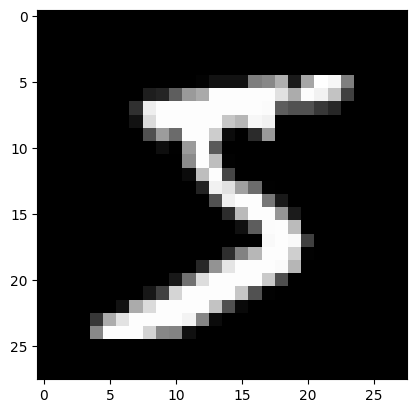

In [9]:
# Visualización como imagen
%matplotlib inline  

# Seleccionamos un dígito (posición de una imagen)
digit = 0 # Cambiar número para elegir otro dígito
a = x_train[digit]

# Visualización en escala de grises
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

Imagen (#0): Representa el dígito '5'


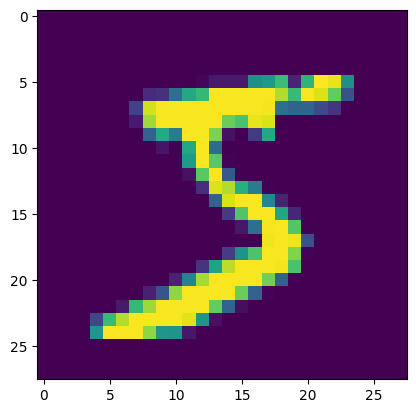

In [10]:
# Visualización en color
plt.imshow(a, interpolation='nearest')
print("Imagen (#{}): Representa el dígito '{}'".format(digit,y_train[digit]))


#### Definición de parámetros

In [11]:
batch_size = 128
num_classes = 10
epochs = 2

# Dimensiones de la imagen de entrada
img_rows, img_cols = 28, 28

#### Comprobamos nuevamente el formato de "x_train" y "x_test"

In [12]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Cambiamos el formato de las imágenes de los conjuntos de entrenamiento y test

##### Las matrices de entrada tienen que tener un formato específico para entrar en el modelo

In [13]:
# Si el formato de las imágenes sólo tiene un canal (escala de grises)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
# en otro caso
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

##### Comprobamos el nuevo formato de "x_train" y "x_test"

In [14]:
print("Conjunto de Training: {}".format(x_train.shape[0]), 'imágenes')
print(x_train.shape)

print()
print("Conjunto de TEST: {}".format(x_test.shape[0]), 'imágenes')
print(x_test.shape)

Conjunto de Training: 60000 imágenes
(60000, 28, 28, 1)

Conjunto de TEST: 10000 imágenes
(10000, 28, 28, 1)


In [15]:
# Píxeles de la fila 10 de la primera imagen
print(x_train[0][10])

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [ 14]
 [  1]
 [154]
 [253]
 [ 90]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]]


#### Damos formato a los píxeles de las imágenes de coma flotante de simple precisión

In [16]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#### Normalizamos los píxeles entre [0,1] para que no tengan unos más valor que otros por tener simplemente un número más alto

In [17]:
x_train /= 255
x_test /= 255

#### Visualizamos nuevamente los píxeles de la fila 10 de la primera imagen

In [18]:
print(x_train[0][10])

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.05490196]
 [0.00392157]
 [0.6039216 ]
 [0.99215686]
 [0.3529412 ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


## Convierte los vectores de clase en matrices de clases binarias

In [19]:
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [20]:
# Etiqueta de la primera imagen
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


#### Diseño de un modelo CNN

In [21]:
# Modelo para CLASIFICACIÓN DE IMÁGENES

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))      # input_shape = (28, 28, 1)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

2022-08-29 16:57:37.006674: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-29 16:57:37.006719: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-29 16:57:37.006741: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e27049907d8c): /proc/driver/nvidia/version does not exist
2022-08-29 16:57:37.007030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


#### Visualizamos la ARQUITECTURA DE LA RED CNN

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

#### Compilamos el modelo

In [23]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### Entrenamos el modelo

In [24]:
start_time = time.time()
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)
end_time = time.time()

Epoch 1/2
469/469 - 61s - loss: 0.2411 - accuracy: 0.9266 - 61s/epoch - 130ms/step
Epoch 2/2
469/469 - 76s - loss: 0.0863 - accuracy: 0.9737 - 76s/epoch - 162ms/step


In [25]:
# Tiempo de entrenamiento
elapsed_time = end_time - start_time
print('Tiempo estimado de entrenamiento (min):', np.around(elapsed_time/60))

Tiempo estimado de entrenamiento (min): 2.0


#### Entrenamiento y evaluación del modelo y tiempo de ejecución

> ##### Entrenamiento: validando con el conjunto de test
> ##### Evaluación del modelo para el conjunto de test
> ##### Tiempo de ejecución

In [26]:
import time

start_time = time.time()

model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose=2,      # visualización del progreso de entrenamiento
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=2)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time

Epoch 1/2
469/469 - 66s - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.0344 - val_accuracy: 0.9884 - 66s/epoch - 141ms/step
Epoch 2/2
469/469 - 64s - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0360 - val_accuracy: 0.9880 - 64s/epoch - 136ms/step
313/313 - 2s - loss: 0.0360 - accuracy: 0.9880 - 2s/epoch - 7ms/step
Test loss: 0.036013975739479065
Test accuracy: 0.9879999756813049


In [27]:
# Tiempo de entrenmiento
elapsed_time = end_time - start_time
print('Tiempo estimado de entrenamiento (min):', np.around(elapsed_time/60))

Tiempo estimado de entrenamiento (min): -0.0


#### Predecimos el conjunto de TEST con el modelo que hemos diseñado 

##### np.newaxis simplemente aumenta una dimensión a la matriz de la imagen

In [28]:
pred = model.predict(x_test[np.newaxis,1])

1/1 [==============================] - 0s 99ms/step


In [29]:
pred

array([[2.3503761e-09, 2.8821162e-08, 1.0000000e+00, 1.1756397e-10,
        4.7628308e-12, 3.7989256e-12, 5.7901190e-08, 2.4980592e-11,
        1.3146609e-11, 1.9450285e-13]], dtype=float32)

#### Buscamos los índices de los valores más altos dentro de un array. 
#### Donde el argumento axis= significa:

> ##### axis=0: a lo largo de una fila
> #### axis=1: a lo largo de una columna

In [30]:
prediccion = pred.argmax(axis=1)

In [31]:
prediccion

array([2])

La predicción es:  2


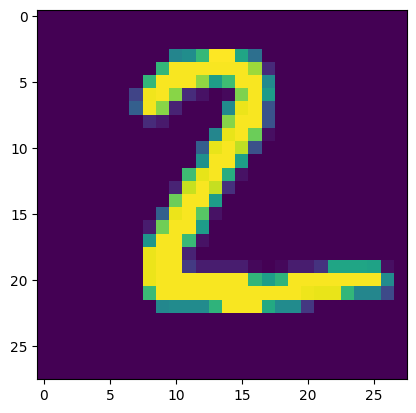

In [32]:
print('La predicción es: ', prediccion[0])  # tiene la posición de la clase que ha tenido mayor probabilidad
img = (x_test[1]*255).reshape((28,28)).astype('uint8')
plt.imshow(img)
plt.show()

#### PREDICCIÓN de todas las imágenes

1/1 [==============================] - 0s 20ms/step
La predicción es:  7


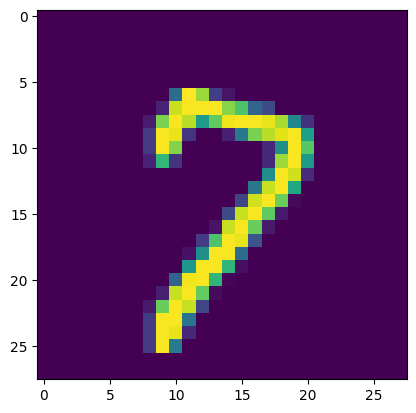

1/1 [==============================] - 0s 18ms/step
La predicción es:  5


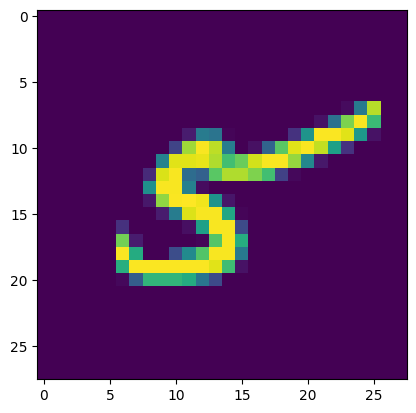

1/1 [==============================] - 0s 18ms/step
La predicción es:  2


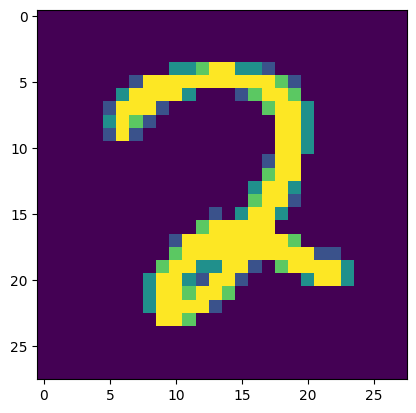

1/1 [==============================] - 0s 18ms/step
La predicción es:  5


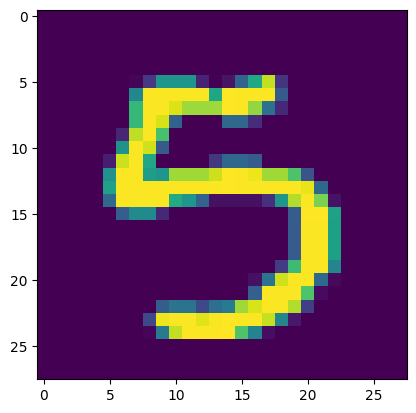

1/1 [==============================] - 0s 18ms/step
La predicción es:  3


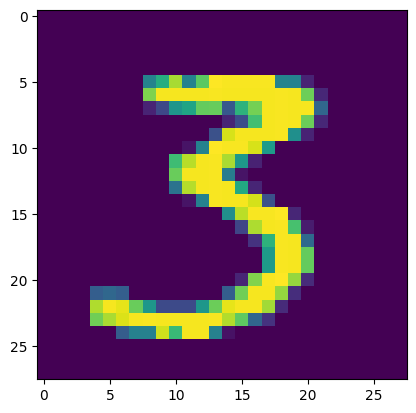

1/1 [==============================] - 0s 19ms/step
La predicción es:  9


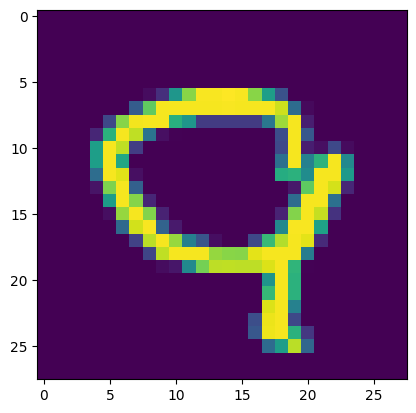

1/1 [==============================] - 0s 20ms/step
La predicción es:  2


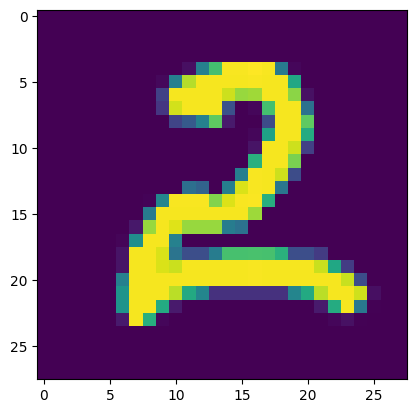

1/1 [==============================] - 0s 18ms/step
La predicción es:  2


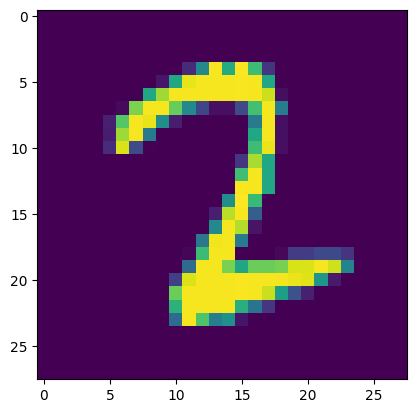

1/1 [==============================] - 0s 23ms/step
La predicción es:  8


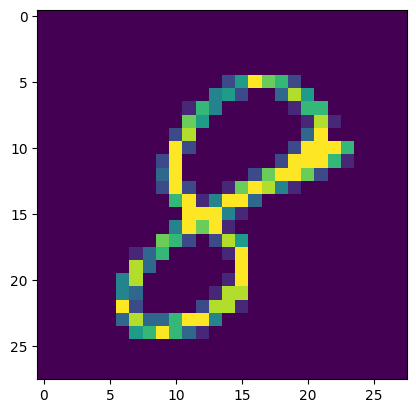

1/1 [==============================] - 0s 17ms/step
La predicción es:  8


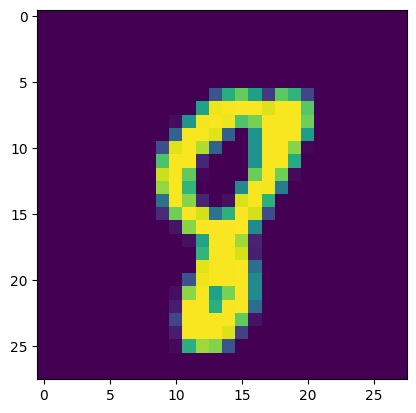

In [33]:
# Visualizamos las predicciones y sus imágenes
for i in np.random.choice(np.arange(0,len(y_test)), size=(10,)):
  pred = model.predict(x_test[np.newaxis, i])
  prediccion = pred.argmax(axis=1)
  img = (x_test[i]*255).reshape((28,28)).astype('uint8')
  print('La predicción es: ', prediccion[0])
  plt.imshow(img)
  plt.show()

# CAMBIAMOS LA CONFIGURACIÓN DE CUADERNO A **GPU**

#### Volvemos a ejecutar todo el notebook para ver diferencias y tiempos de ejecución


#### Información sobre la máquina GPU 

In [34]:
!nvidia-smi

/usr/bin/sh: 1: nvidia-smi: not found
